In [17]:
#import required packages
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt

In [10]:
pd.set_option('display.max_colwidth', 100)
df = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
df.columns = ['type', 'body_text']
df.head()

,type,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [11]:
#computing body text length
df['body_text_len'] = df['body_text'].apply(lambda x: len(x) - x.count(" "))
df.head()

,type,body_text,body_text_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


In [12]:
#computing percentage of punctuation in body text
def count_punct(text):
    punct_count = sum([1 for char in text if char in string.punctuation])
    return round(punct_count / (len(text) - text.count(" ")), 3) * 100

df['punct_percentage'] = df['body_text'].apply(lambda x: count_punct(x))
df.head()

,type,body_text,body_text_len,punct_percentage
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


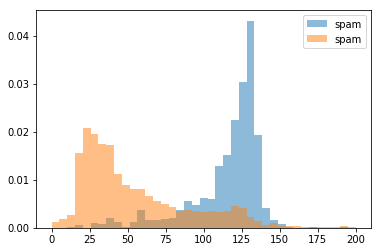

In [18]:
bins = np.linspace(0,200,40)
plt.hist(df[df['type'] == 'spam']['body_text_len'],bins,density=True, label='spam',alpha=0.5)
plt.hist(df[df['type'] == 'ham']['body_text_len'],bins,density=True, label='ham',alpha=0.5)
plt.legend(loc='upper right')
plt.show()

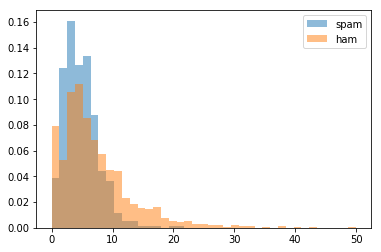

In [22]:
bins = np.linspace(0,50,40)
plt.hist(df[df['type'] == 'spam']['punct_percentage'],bins,density=True,label='spam',alpha=0.5)
plt.hist(df[df['type'] == 'ham']['punct_percentage'],bins,density=True,label='ham',alpha=0.5)
plt.legend(loc='upper right')
plt.show()

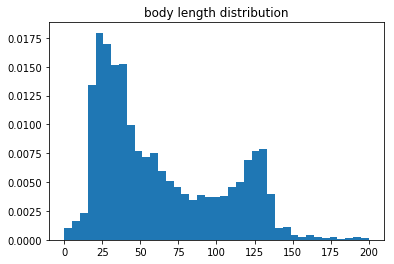

In [25]:
#Lets check the distribution for full feature vector body length and body punct %
bins = np.linspace(0,200,40)
plt.hist(df['body_text_len'], bins=bins,density=True)
plt.title('body length distribution')
plt.show()

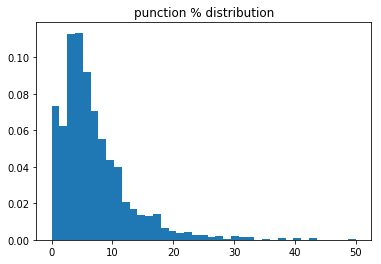

In [26]:
bins = np.linspace(0,50,40)
plt.hist(df['punct_percentage'], bins=bins,density=True)
plt.title('punction % distribution')
plt.show()

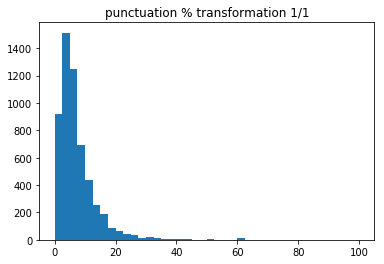

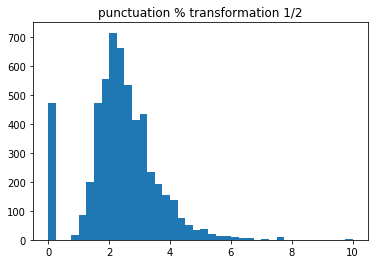

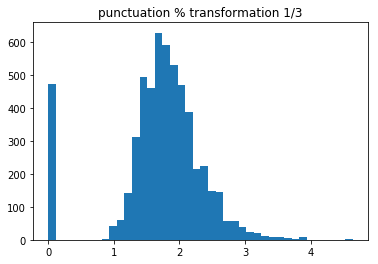

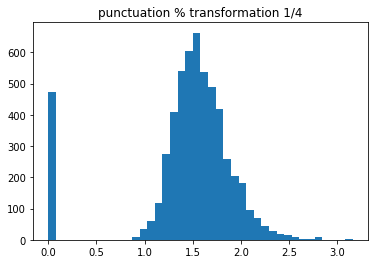

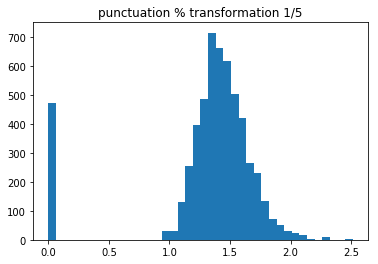

In [28]:
#We see that punctuation % is more skewed, this type of distribution would require transformation
#box cox transformation y**1/[1,2,3,4,5]
for i in [1,2,3,4,5]:
    plt.hist((df['punct_percentage'])**(1/i), bins=40)
    plt.title('punctuation % transformation 1/{}'.format(str(i)))
    plt.show()
